In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class RGB_image:
    """
    RGB image processing

    ...

    Attributes
    ----------
    np_img : numpy.ndarray
        the image converted to np array

    Methods
    -------
    get_rgb_hist()
        Returns an array with the RGB(A) histogram values of the image.
    show_channels()
        Splits the image into RGB(A) channels and displays them separately.
    plot_rgb_hist(hist, normalize=False, yscale_type='linear')
        Displays histograms of RGB channels.
"""

    def __init__(self, image):
        self.img_mode = image.mode
        self.np_img = np.asarray(image)
    
    
    def __normalize_data(self, data):
        return (data - data.min()) / (data.max() - data.min())
    
    
    def get_rgb_hist(self):
        r = np.zeros((256,))
        g = np.zeros((256,))
        b = np.zeros((256,))

        for i, c in enumerate([r, g, b]):
            channel = self.np_img[:,:,i].flatten()
            for j in range(channel.size):
                val = channel[j]
                c[val] += 1
        return np.array([r, g, b])
    
    
    def show_channels(self):
        fig=plt.figure(figsize=(16, 8))
        columns = 2
        rows = 2

        for i in range(4):
            temp = np.zeros(self.np_img.shape, dtype='uint8')
            if i == 0:
                temp=self.np_img
            else:
                temp[:,:,i-1] = self.np_img[:,:,i-1] 
                if self.img_mode=='RGBA': 
                    temp[:,:,3] = self.np_img[:,:,3] 
            fig.add_subplot(rows, columns, i+1)
            plt.imshow(temp)

        plt.show()

        
    def plot_rgb_hist(self, hist, normalize=False, yscale_type='linear'):
        if normalize:
            temp_hist = np.array([__normalize_data(data) for data in hist])
        else:
            temp_hist = hist

        fig=plt.figure(figsize=(20, 5), dpi=150)
        columns = 3
        rows = 1

        for i, c in enumerate(['r','g','b']):
            fig.add_subplot(1, 3, i+1)
            plt.bar(np.arange(0, 256), temp_hist[i], width=1.0, color=c)

            plt.xlabel('brightness')
            plt.ylabel('number of pixels')
            plt.title(c + ' channel')

            plt.grid(True)
            plt.yscale(yscale_type)

        plt.show()

In [16]:
img_path = input("Enter file path: ") 

Enter file path: 3.png


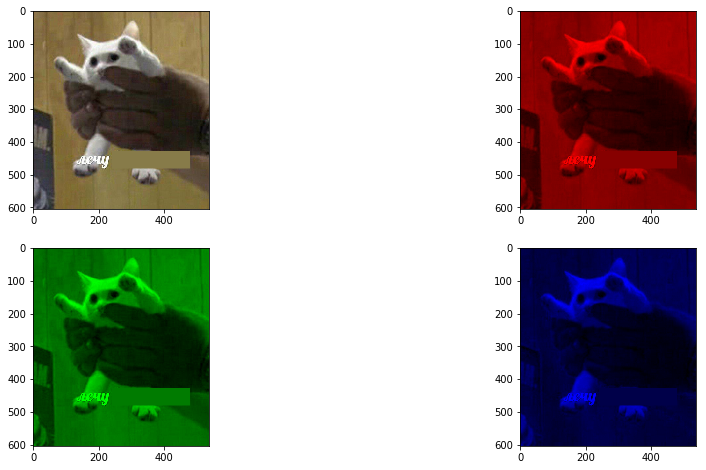

In [17]:
image = RGB_image(Image.open(img_path))
image.show_channels()

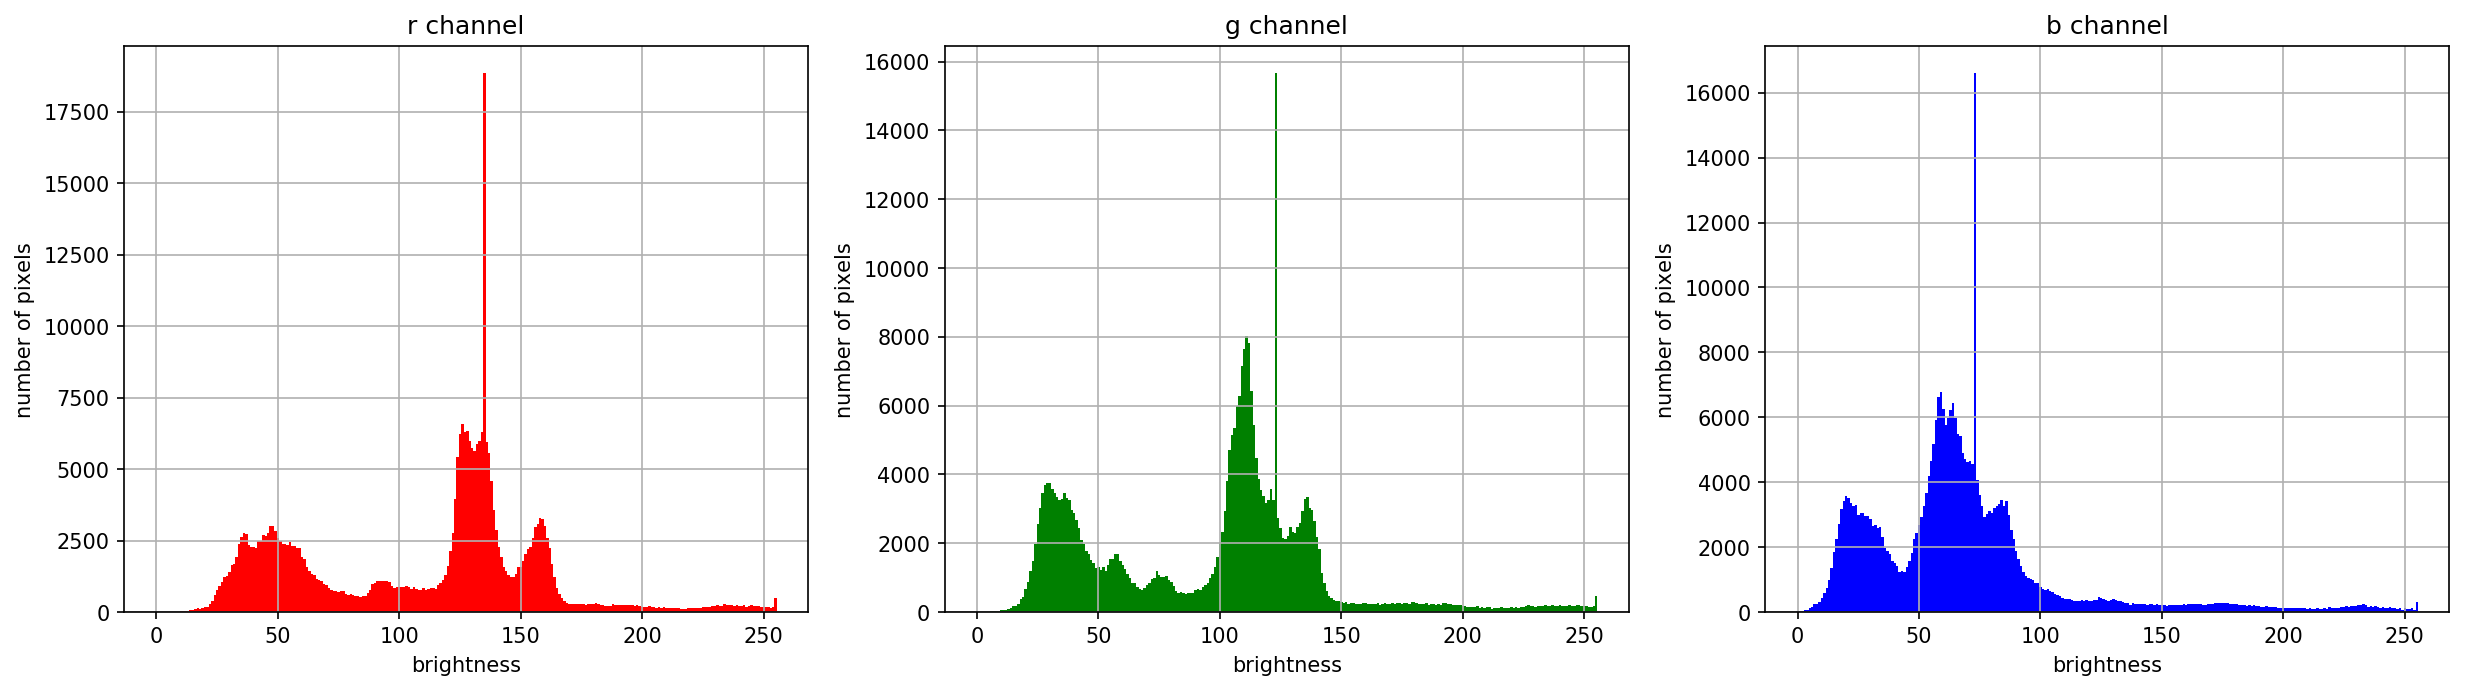

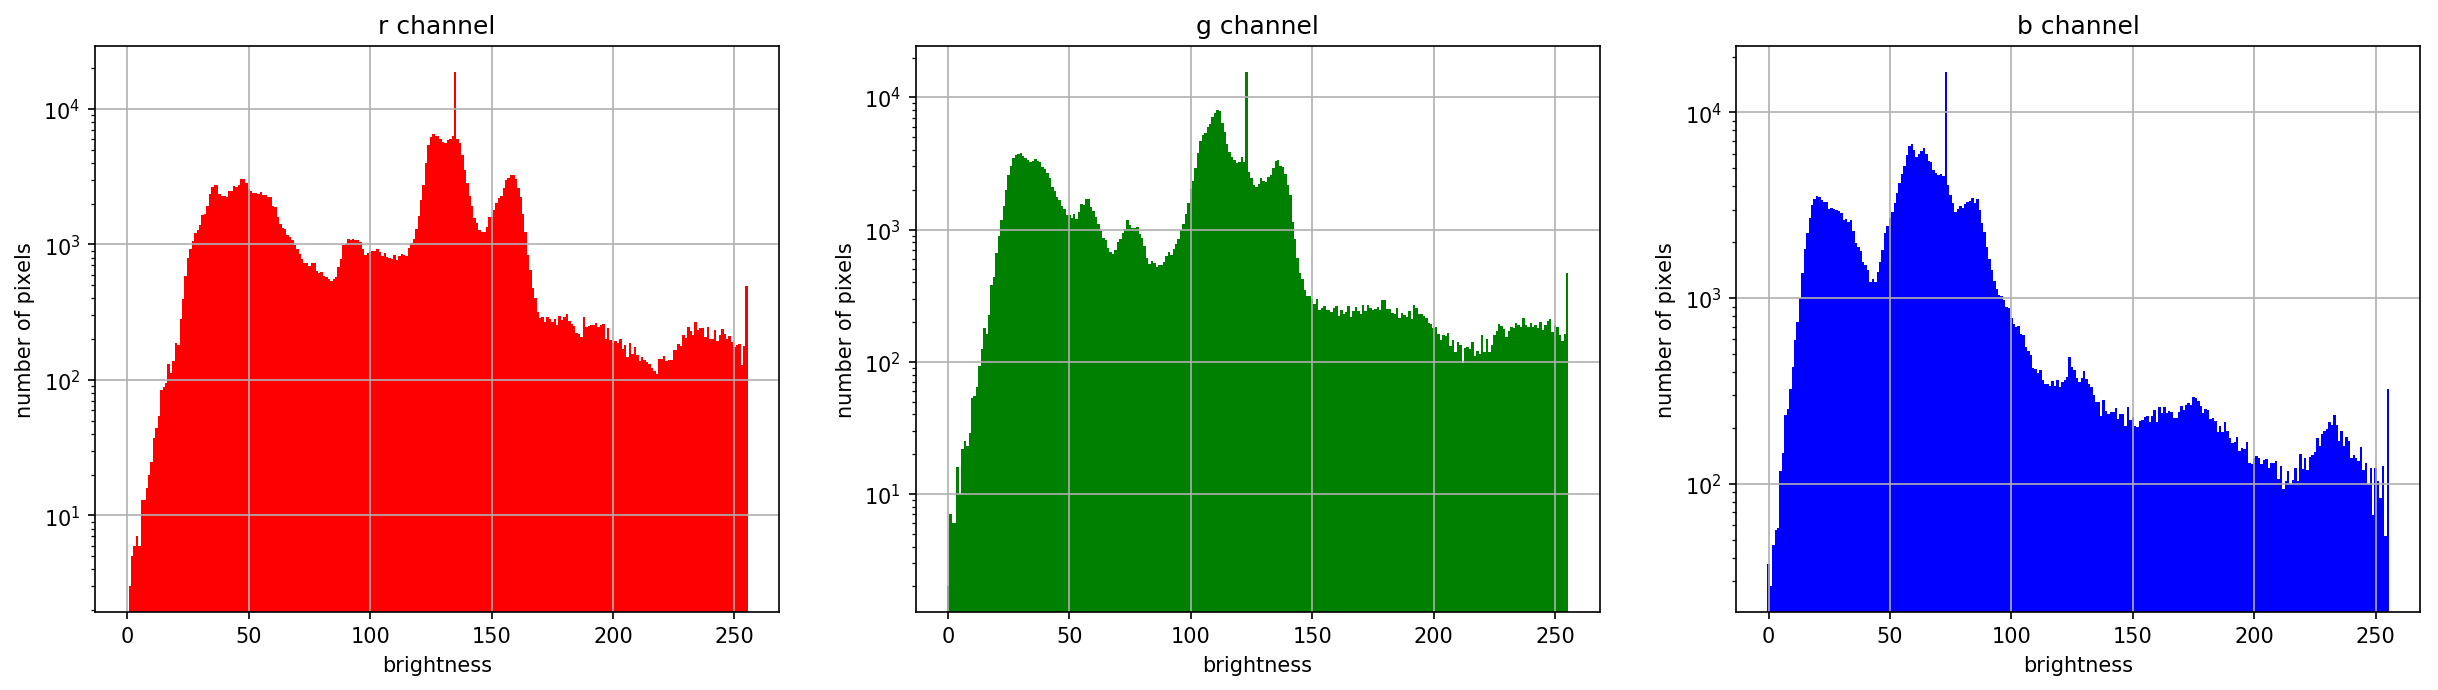

In [18]:
hist = image.get_rgb_hist()
image.plot_rgb_hist(hist)
image.plot_rgb_hist(hist, yscale_type='log')